In [115]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
%ls

aux-info/            explore_bosch.ipynb
bosch-kaggle/        preparation.md


In [117]:
train = pd.read_csv('bosch-kaggle/data/train_numeric.csv', nrows=100000)

In [118]:
train.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


(array([ 648.,  103.,   45.,    0.,   16.,   17.,   32.,    0.,    3.,  106.]),
 array([  7.60000000e+01,   1.00684000e+04,   2.00608000e+04,
          3.00532000e+04,   4.00456000e+04,   5.00380000e+04,
          6.00304000e+04,   7.00228000e+04,   8.00152000e+04,
          9.00076000e+04,   1.00000000e+05]),
 <a list of 10 Patch objects>)

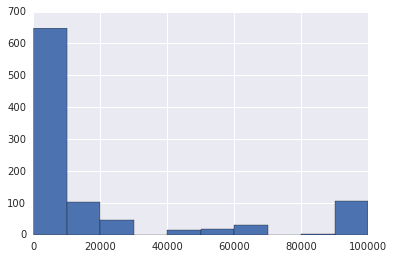

In [119]:
plt.hist(train.count())

In [120]:
columns_preserve_NaN_ratio = 0.1
#Drop excessive NaN Columns
shape_before = train.shape
train = train.dropna(axis='columns', thresh=int(train.shape[0] * columns_preserve_NaN_ratio))
print(shape_before, train.shape)

(100000, 970) (100000, 336)


(array([  3.59000000e+02,   4.88200000e+03,   2.26000000e+02,
          3.20000000e+01,   8.71000000e+02,   2.23900000e+03,
          3.10010000e+04,   2.04850000e+04,   3.97140000e+04,
          1.91000000e+02]),
 array([   2. ,   25.5,   49. ,   72.5,   96. ,  119.5,  143. ,  166.5,
         190. ,  213.5,  237. ]),
 <a list of 10 Patch objects>)

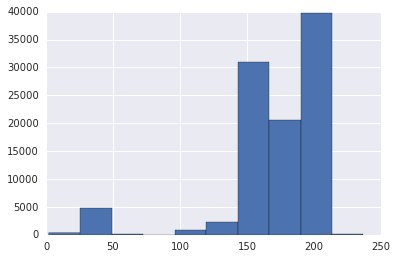

In [121]:
plt.hist(train.T.count())

In [122]:
rows_preserve_NaN_ratio = 0.25
#Drop excessive NaN rows
shape_before = train.shape
train = train.dropna(axis='index', thresh=int(train.shape[1] * rows_preserve_NaN_ratio))
print(shape_before, train.shape)

(100000, 336) (94512, 336)


(array([  1.90000000e+01,   1.32000000e+02,   8.24000000e+02,
          3.81700000e+03,   2.16460000e+04,   9.07100000e+03,
          1.91720000e+04,   3.96350000e+04,   1.31000000e+02,
          6.50000000e+01]),
 array([  85. ,  100.2,  115.4,  130.6,  145.8,  161. ,  176.2,  191.4,
         206.6,  221.8,  237. ]),
 <a list of 10 Patch objects>)

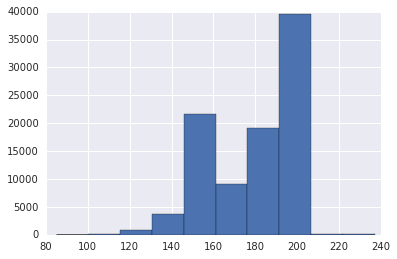

In [124]:
plt.hist(train.T.count())

In [125]:
#Impute to median (better for outlier)
train_median = train.median().drop(['Id', 'Response'])
train = train.fillna(train_median)

In [126]:
train.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S36_F3924,L3_S36_F3926,L3_S36_F3930,L3_S36_F3934,L3_S36_F3938,L3_S37_F3944,L3_S37_F3946,L3_S37_F3948,L3_S37_F3950,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,-0.023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,6,0.003,0.004,-0.033,-0.034,0.031,0.070,0.000,-0.032,0.000,...,-0.023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,-0.023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,-0.030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,0.083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [127]:
Y_train = train['Response']
x_train = train.drop('Response', axis=1)


In [128]:
#hold-out
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train, Y_train,
                                                random_state=1)

In [129]:
Xtrain=Xtrain.drop('Id', axis=1)

In [130]:
Xtest.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S36_F3922,L3_S36_F3924,L3_S36_F3926,L3_S36_F3930,L3_S36_F3934,L3_S36_F3938,L3_S37_F3944,L3_S37_F3946,L3_S37_F3948,L3_S37_F3950
23650,47376,0.003,0.004,-0.033,-0.034,0.031,0.070,0.000,-0.032,0.000,...,0.008,0.011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49760,99657,0.003,0.004,-0.033,-0.034,0.031,0.070,0.000,-0.032,0.000,...,0.008,-0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28896,57929,-0.062,-0.056,-0.015,-0.052,-0.187,-0.430,0.008,0.048,-0.082,...,0.008,-0.023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80224,160826,-0.016,-0.049,-0.179,-0.161,-0.100,0.025,-0.007,-0.032,-0.179,...,0.008,-0.023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99670,199663,0.003,-0.034,-0.033,-0.016,-0.013,-0.248,0.000,0.008,-0.194,...,0.008,0.052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
Xtrain.head()

,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,...,L3_S36_F3922,L3_S36_F3924,L3_S36_F3926,L3_S36_F3930,L3_S36_F3934,L3_S36_F3938,L3_S37_F3944,L3_S37_F3946,L3_S37_F3948,L3_S37_F3950
20670,0.003,0.004,-0.033,-0.034,0.031,0.070,0.000,-0.032,0.000,0.002,...,0.008,-0.023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26008,0.003,0.004,-0.033,-0.034,0.031,0.070,0.000,-0.032,0.000,0.002,...,0.008,-0.107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27827,0.003,-0.004,-0.179,-0.197,-0.056,0.070,-0.015,-0.072,0.046,0.136,...,0.008,-0.023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75242,0.003,0.004,-0.033,-0.034,0.031,0.070,0.000,-0.032,0.000,0.002,...,0.008,-0.023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6979,0.062,0.056,-0.015,-0.016,0.031,0.161,-0.015,-0.072,-0.072,-0.024,...,-0.092,-0.028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10)
from sklearn.svm import SVC # "Support Vector Classifier"
model = SVC(kernel='linear')

In [ ]:
model.fit(Xtrain, ytrain)

In [140]:
feature_dict = {}
for i,f in zip(model.feature_importances_,Xtrain.columns):
    feature_dict[f] = i

AttributeError: 'GaussianNB' object has no attribute 'feature_importances_'

In [141]:
y_model = model.predict(Xtest.drop('Id',axis=1))

In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.082656170644997459

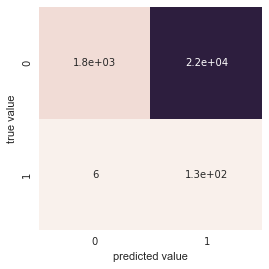

In [143]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [146]:
Xtest.shape

(23628, 335)

In [147]:
Xtrain.shape

(70884, 334)